In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import tqdm
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
raw_dataset = pd.read_csv('California_housing.csv')

In [ ]:
raw_dataset.fillna('UNK',inplace=True)

## Gradient Descent
$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$
$$𝑓(𝑚,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i+b))^2$$

**Partial Derivative With Respect to m**
$$\frac{\partial f}{\partial m} = \frac{1}{n}\sum_{i=1}^{n}-2x_i(y_i - (mx_i+b))$$

**Partial Derivative With Respect to b**

$$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (mx_i+b))$$

In [205]:
def dldw(x,y,y_pred):   
    n = len(y) 
    y = np.asarray(y)
    y_pred = np.asarray(y_pred)
    s=[]
    for i in range(n):
        s+=[(-x[i])*(y[i]-y_pred[i])]    
    return sum((2/n)*np.array(s))

In [259]:
def predict(x,weight,intercept):
    y_pred = []
    x = np.asarray(x) 
    n=len(x)
    for i in range(n):
        y_pred.append(weight @ x[i] + intercept)
    return np.array(y_pred).reshape(x.shape[0],1)


def mse_loss(y,y_pred):
    n=len(y)
    y = np.asarray(y)
    y_pred = np.asarray(y_pred)
    return (1/n)*sum((y - y_pred)**2)
    

def dldw(x,y,y_pred):   
    n = len(y) 
    y = np.asarray(y)
    y_pred = np.asarray(y_pred)
    s=[]
    for i in range(n):
        s+=[(-x[i])*(y[i]-y_pred[i])] 

    return (2/n)*np.array(s).sum(axis=0)


def dldb(y,y_pred):
    n = len(y)
    y = np.asarray(y)
    y_pred = np.asarray(y_pred)
    return (-2/n) * np.sum(y - y_pred)

def gradient_descent(x,y): 
    learning_rate = 0.01
    epoch= 1000
    weight = np.random.randn(x.shape[1])
    bias = 0
    x = np.asarray(x)
    loss = []
    for i in tqdm.tqdm(range(epoch)):
        y_pred = predict(x,weight,bias)
        weight = weight - learning_rate * dldw(x,y,y_pred)
        bias = bias - learning_rate * dldb(y,y_pred)
        loss.append(mse_loss(y,y_pred))
    return (weight,bias,loss)

    

In [260]:
weight,bias,loss = gradient_descent(X_train_scaled,train_target_df)

100%|██████████| 1000/1000 [01:19<00:00, 12.50it/s]


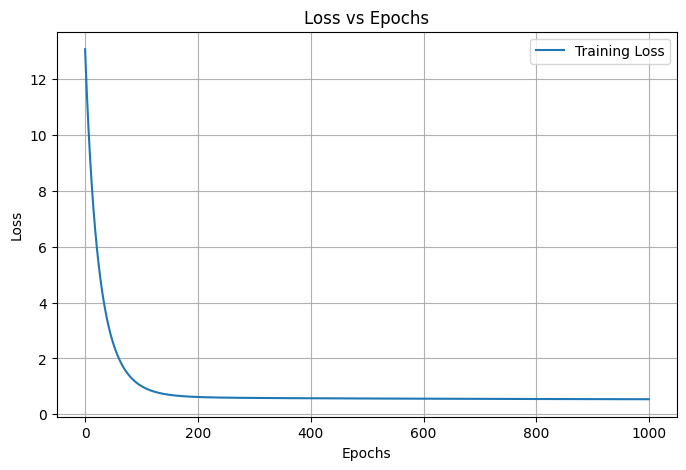

In [261]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(loss, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [257]:
np.array(loss).shape

(100, 1)

In [ ]:
# x = np.array([[1,2],[2,4],[3,5],[4,2]])
# y = np.array([2,5,2,2])
# y_pred = np.array([4,8,3,4])


In [90]:
features = raw_dataset[['Latitude', 'Longitude', 'HouseAge', 'AveRooms','AveBedrms', 'Population', 'AveOccup', 'MedInc']]
target = raw_dataset[['Housing_Value']]

In [91]:
from sklearn.model_selection import train_test_split

#Splitting Feature and Target into Training and Test Data.
train_feature_df, test_feature_df = train_test_split(features,shuffle = True, test_size = 0.25, random_state=12)
train_target_df, test_target_df = train_test_split(target,shuffle = True, test_size = 0.25, random_state=12)

In [92]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Normalizing the data using Standard Scaler and fiiting it into the dataset.
scaler = StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(train_feature_df),columns=train_feature_df.columns, index=train_feature_df.index)